In [34]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_bokeh
pandas_bokeh.output_file("Interactive Plot.html")

geodata = gpd.read_file("shp/g1g14vz.shp")
votedata1 = pd.read_csv("data.csv")
votedata.columns = ['GMDNAME', 'JA','NEIN', 'BETEILIGUNG', 'KANTONKZ', 'KANTNAME', 'GMDNR', 'PFLICHTIG', 'MITTELWERT', 'MEDIAN', 'GINI', 'JAPERC']


In [35]:
geodata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
GMDNR       2356 non-null int64
GMDNAME     2356 non-null object
BZNR        2356 non-null int64
KTNR        2356 non-null int64
GRNR        2356 non-null int64
AREA_HA     2356 non-null int64
X_MIN       2356 non-null int64
X_MAX       2356 non-null int64
Y_MIN       2356 non-null int64
Y_MAX       2356 non-null int64
X_CNTR      2356 non-null int64
Y_CNTR      2356 non-null int64
Z_MIN       2356 non-null int64
Z_MAX       2356 non-null int64
Z_AVG       2356 non-null int64
Z_MED       2356 non-null int64
geometry    2356 non-null object
dtypes: int64(15), object(2)
memory usage: 313.0+ KB


Before combining the two data frames we have to merge some areas

In [36]:
# Deisswil bei Münchenbuchsee und Wiggiswil
# create data frame containing the two
deisswil_wiggiswil = pd.concat([geodata[geodata['GMDNAME']=='Deisswil bei Münchenbuchsee'], geodata[geodata['GMDNAME']=='Wiggiswil']])
# merge the polys
deisswilpoly =deisswil_wiggiswil.iat[0,16]
wiggiswilpoly =deisswil_wiggiswil.iat[1,16]
deisswilwiggiswilpoly=deisswilpoly.union(wiggiswilpoly)
# make a result df containing the new name and poly
df = gpd.GeoDataFrame({'GMDNAME':['Wiggiswil und Deisswil bei Münchenbuchsee'], 'geometry':[deisswilwiggiswilpoly]} )
# merge it back to the geodata data frame
geodata = pd.concat([geodata, df])
# drop the now unneeded rows
geodata=geodata[geodata.GMDNAME != 'Wiggiswil']
geodata=geodata[geodata.GMDNAME != 'Deisswil bei Münchenbuchsee']
geodata[geodata['GMDNAME']=='Wiggiswil und Deisswil bei Münchenbuchsee']

/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


AREA_HA  BZNR                                    GMDNAME  GMDNR  GRNR  \
0      NaN   NaN  Wiggiswil und Deisswil bei Münchenbuchsee    NaN   NaN   

   KTNR  X_CNTR  X_MAX  X_MIN  Y_CNTR  Y_MAX  Y_MIN  Z_AVG  Z_MAX  Z_MED  \
0   NaN     NaN    NaN    NaN     NaN    NaN    NaN    NaN    NaN    NaN   

   Z_MIN                                           geometry  
0    NaN  POLYGON ((602035.1075000018 209920.4012999982,...

In [37]:
# Höchstetten und Hellsau
# create data frame containing the two
hoechst_hellsau = pd.concat([geodata[geodata['GMDNAME']=='Höchstetten'], geodata[geodata['GMDNAME']=='Hellsau']])
# merge the polys
hoechstpoly =hoechst_hellsau.iat[0,16]
hellsaupoly =hoechst_hellsau.iat[1,16]
hoechsthellsaupoly=hoechstpoly.union(hellsaupoly)
# make a result df containing the new name and poly
df = gpd.GeoDataFrame({'GMDNAME':['Höchstetten und Hellsau'], 'geometry':[hoechsthellsaupoly]} )
# merge it back to the geodata data frame
geodata = pd.concat([geodata, df])
# drop the now unneeded rows
geodata=geodata[geodata.GMDNAME != 'Höchstetten']
geodata=geodata[geodata.GMDNAME != 'Hellsau']
geodata[geodata['GMDNAME']=='Höchstetten und Hellsau']

/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


AREA_HA  BZNR                  GMDNAME  GMDNR  GRNR  KTNR  X_CNTR  X_MAX  \
0      NaN   NaN  Höchstetten und Hellsau    NaN   NaN   NaN     NaN    NaN   

   X_MIN  Y_CNTR  Y_MAX  Y_MIN  Z_AVG  Z_MAX  Z_MED  Z_MIN  \
0    NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                            geometry  
0  POLYGON ((615611.1000000015 220689.8612999991,...

In [38]:
# Ersigen, Niederösch, Oberösch
# create data frame containing the two
erniob = pd.concat([geodata[geodata['GMDNAME']=='Ersigen'], geodata[geodata['GMDNAME']=='Niederösch'],geodata[geodata['GMDNAME']=='Oberösch']])
# merge the polys
erspoly =erniob.iat[0,16]
nipoly =erniob.iat[1,16]
obpoly =erniob.iat[2,16]
erni=erspoly.union(nipoly)
erniobpoly=erni.union(obpoly)
# make a result df containing the new name and poly
df = gpd.GeoDataFrame({'GMDNAME':['Ersigen, Niederösch, Oberösch'], 'geometry':[erniobpoly]} )
# merge it back to the geodata data frame
geodata = pd.concat([geodata, df])
# drop the now unneeded rows
geodata=geodata[geodata.GMDNAME != 'Ersigen']
geodata=geodata[geodata.GMDNAME != 'Niederösch']
geodata=geodata[geodata.GMDNAME != 'Oberösch']

/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [39]:
# Wald und Niedermuhlern
# create data frame containing the two
wani= pd.concat([geodata[geodata['GMDNAME']=='Wald (BE)'], geodata[geodata['GMDNAME']=='Niedermuhlern']])
# merge the polys
wapoly =wani.iat[0,16]
nipoly =wani.iat[1,16]
wanipoly=wapoly.union(nipoly)
# make a result df containing the new name and poly
df = gpd.GeoDataFrame({'GMDNAME':['Wald und Niedermuhlern'], 'geometry':[wanipoly]} )
# merge it back to the geodata data frame
geodata = pd.concat([geodata, df])
# drop the now unneeded rows
geodata=geodata[geodata.GMDNAME != 'Wald (BE)']
geodata=geodata[geodata.GMDNAME != 'Niedermuhlern']

/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [40]:
# Münchenwiler und Clavaleyres
# create data frame containing the two
muecla= pd.concat([geodata[geodata['GMDNAME']=='Münchenwiler'], geodata[geodata['GMDNAME']=='Clavaleyres']])
# merge the polys
muepoly =muecla.iat[0,16]
clapoly =muecla.iat[1,16]
mueclapoly=muepoly.union(clapoly)
# make a result df containing the new name and poly
df = gpd.GeoDataFrame({'GMDNAME':['Münchenwiler und Clavaleyres'], 'geometry':[mueclapoly]} )
# merge it back to the geodata data frame
geodata = pd.concat([geodata, df])
# drop the now unneeded rows
geodata=geodata[geodata.GMDNAME != 'Münchenwiler']
geodata=geodata[geodata.GMDNAME != 'Clavaleyres']

/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [41]:
# Kirchdorf, Jaberg, Noflen
# create data frame containing the two
kijano = pd.concat([geodata[geodata['GMDNAME']=='Kirchdorf (BE)'], geodata[geodata['GMDNAME']=='Jaberg'],geodata[geodata['GMDNAME']=='Noflen']])
# merge the polys
kipoly =kijano.iat[0,16]
japoly =kijano.iat[1,16]
nopoly =kijano.iat[2,16]
kija=kipoly.union(japoly)
kijanopoly=kija.union(nopoly)
# make a result df containing the new name and poly
df = gpd.GeoDataFrame({'GMDNAME':['Kirchdorf, Jaberg, Noflen'], 'geometry':[kijanopoly]} )
# merge it back to the geodata data frame
geodata = pd.concat([geodata, df])
# drop the now unneeded rows
geodata=geodata[geodata.GMDNAME != 'Kirchdorf (BE)']
geodata=geodata[geodata.GMDNAME != 'Jaberg']
geodata=geodata[geodata.GMDNAME != 'Noflen']

/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [42]:
# Mötschwil und Rüti bei Lyssach
# create data frame containing the two
moerue= pd.concat([geodata[geodata['GMDNAME']=='Mötschwil'], geodata[geodata['GMDNAME']=='Rüti bei Lyssach']])
# merge the polys
moepoly =moerue.iat[0,16]
ruepoly =moerue.iat[1,16]
moeruepoly=moepoly.union(ruepoly)
print(moeruepoly)
# make a result df containing the new name and poly
df = gpd.GeoDataFrame({'GMDNAME':['Mötschwil und Rüti bei Lyssach'], 'geometry':[moeruepoly]} )
# merge it back to the geodata data frame
geodata = pd.concat([geodata, df])
# drop the now unneeded rows
geodata=geodata[geodata.GMDNAME != 'Mötschwil']
geodata=geodata[geodata.GMDNAME != 'Rüti bei Lyssach']

POLYGON ((610931.2650000006 210725.4924999997, 610604.4175000004 210472.7987999991, 610757.5487999991 209763.2963000014, 610522.8924999982 209445.6213000007, 610695.3863000013 209263.8350000009, 609999.3638000004 209318.5513000004, 609989.4074999988 210013.9475000016, 609634.7199999988 209771.9400000013, 609631.1713000014 209540.8775000013, 609304.7413000017 209538.7274999991, 609345.75 209802.5599999987, 609117.7950000018 209935.4974999987, 609557.5850000009 210291.4774999991, 609386.7813000008 210559.4237999991, 609241.4563000016 210704.8412999995, 608935.7800000012 210595.0199999996, 608752.1963 210891.9750000015, 609036.0124999993 211345.8438000008, 609352.2399999984 211487.5899999999, 610068.7912999988 211581.4624999985, 609943.5538000017 211763.6187999994, 610257.9499999993 211696.0599999987, 610534.8674999997 212248.5549999997, 610918.9600000009 212052.0100000016, 611026.1862999983 211652.4662999995, 611535.0399999991 211725.3000000007, 612177.3024999984 211686.3962999992, 61211

/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [43]:
geodata_names= geodata["GMDNAME"].tolist()
votedata_names = votedata["GMDNAME"].tolist()
# names of geodata that are not in votedata
difference = np.setdiff1d(votedata_names,geodata_names)
difference

array([], dtype='<U41')

this remaining pieces do either belong to multiple or no municipality so we leave them unchanged

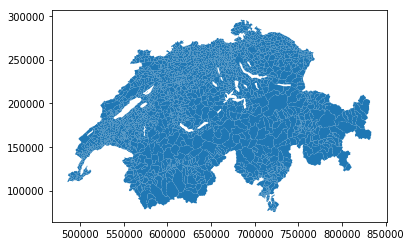

In [44]:
geodata.plot()

In [11]:
votedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 12 columns):
GMDNAME        2343 non-null object
JA             2343 non-null int64
NEIN           2343 non-null int64
BETEILIGUNG    2343 non-null float64
KANTONKZ       2343 non-null object
KANTNAME       2343 non-null object
GMDNR          2335 non-null float64
PFLICHTIG      2343 non-null int64
MITTELWERT     2343 non-null float64
MEDIAN         2343 non-null float64
GINI           2343 non-null float64
JAPERC         2343 non-null float64
dtypes: float64(6), int64(3), object(3)
memory usage: 219.7+ KB


In [12]:
alldata = geodata.merge(votedata, on='GMDNAME')

alldata['NEINPERC']=1-alldata['JAPERC']
alldata['JAPERC_P']=100*alldata['JAPERC']
alldata['NEINPERC_P']=100*alldata['NEINPERC']

mydata = alldata
mydata =mydata.drop(columns=['AREA_HA', 'BZNR','JA','NEIN', 'GMDNR_x', 'KTNR', 'X_CNTR', 'X_MAX', 'X_MIN', 'Y_CNTR', 'Y_MAX', 'Y_MIN', 'KANTNAME', 'GMDNR_y', 'GRNR', 'Z_AVG', 'Z_MAX', 'Z_MED','Z_MIN', 'geometry', 'JAPERC', 'NEINPERC','NEINPERC_P',])
mydata = mydata.rename(columns={"GMDNAME": "commune", "JAPERC_P": "yes_perc", "BETEILIGUNG": "turnout_perc", "KANTONKZ": "canton", "PFLICHTIG": "taxable", "MITTELWERT":"mean_income", "MEDIAN":"median_income", "GINI": "gini_coeff"})
#mydata = mydata.iloc[:10]
#mydata=mydata.round(2)
#print(mydata.to_latex())
mydata.head()
#alldata.plot_bokeh()

commune  turnout_perc canton  taxable   mean_income  \
0     Aeugst am Albis         61.53     ZH     1175  65698.135377   
1  Affoltern am Albis         53.61     ZH     6916  48280.396068   
2          Bonstetten         62.59     ZH     2934  58869.421004   
3     Hausen am Albis         60.84     ZH     2003  56154.826909   
4            Hedingen         64.10     ZH     2068  58153.735679   

   median_income  gini_coeff   yes_perc  
0   53400.000000    0.454633  27.490996  
1   43500.000000    0.387098  32.539683  
2   53400.000000    0.376633  31.836735  
3   48187.500000    0.415795  34.263782  
4   49615.079365    0.413124  31.408177

In [13]:
zhall=alldata.query('KANTONKZ=="ZH"')
zhlist=zhall["GMDNAME"].tolist()
one=zhall[zhall['GMDNAME']=="Bonstetten"]
onepoly=one.iat[0,16]
zhpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in zhlist:
    one=zhall[zhall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    zhpoly=zhpoly.union(onepoly)

    

In [14]:


summary=mydata.describe()
summary=summary.round(2)
summary
print(summary.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  turnout\_perc &    taxable &  mean\_income &  median\_income &  gini\_coeff &  yes\_perc \\
\midrule
count &       2343.00 &    2343.00 &      2343.00 &        2343.00 &     2343.00 &   2343.00 \\
mean  &         55.71 &    2129.59 &     47369.02 &       41169.82 &        0.40 &     34.16 \\
std   &          7.78 &    7453.23 &     26138.46 &        7408.75 &        0.07 &      8.51 \\
min   &          0.00 &      16.00 &     17140.96 &        4800.00 &        0.23 &      0.00 \\
25\%   &         50.86 &     366.00 &     40023.35 &       37333.33 &        0.35 &     28.70 \\
50\%   &         54.89 &     822.00 &     44879.45 &       41387.18 &        0.38 &     32.92 \\
75\%   &         60.10 &    2000.50 &     50251.60 &       45469.44 &        0.42 &     38.33 \\
max   &         97.14 &  254158.00 &   1021727.35 &       68600.00 &        0.97 &     79.41 \\
\bottomrule
\end{tabular}



In [15]:

corrdata =mydata.drop(columns=['taxable', 'turnout_perc','commune','canton'])


corr=corrdata.corr(method='spearman')
corr=corr.round(3)
corr

mean_income  median_income  gini_coeff  yes_perc
mean_income          1.000          0.913       0.176    -0.414
median_income        0.913          1.000      -0.050    -0.421
gini_coeff           0.176         -0.050       1.000     0.013
yes_perc            -0.414         -0.421       0.013     1.000

-0.0004470912524961954 52.56642075532764 -0.3891667264713194 1.3884233566912977e-85 2.187249339166825e-05


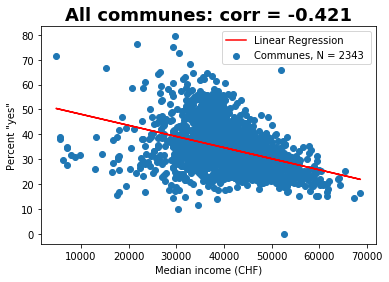

In [16]:
import scipy.stats as stats
y = corrdata['yes_perc']
x = corrdata['median_income']

#plt.scatter(x, y)
#plt.title('Median income and percent "yes"')
#plt.xlabel('Percent "yes"')
#plt.ylabel('Median income')
#plt.show()
corr=corrdata.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[1,3]
n=2343
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('All communes: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()



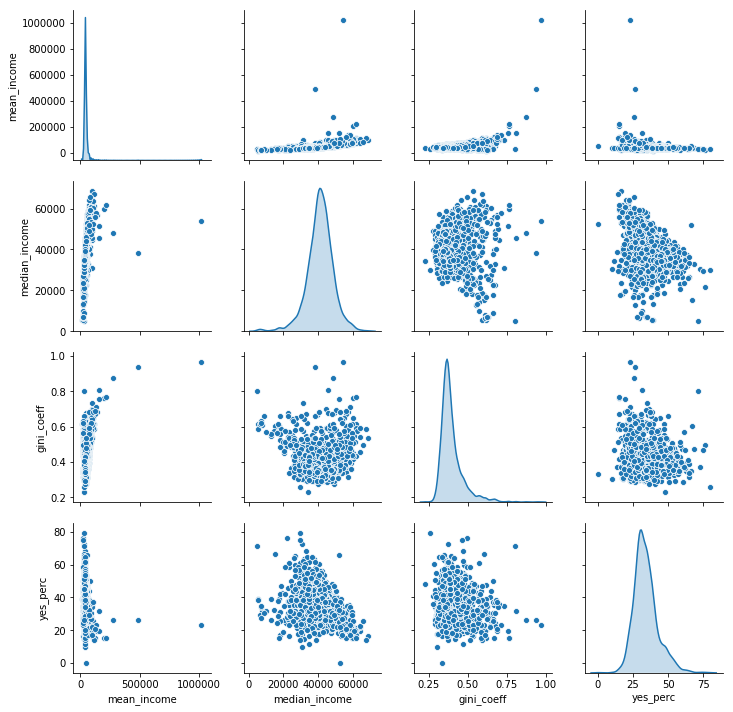

In [17]:
import seaborn
corrdata2 =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
corrdata2.head()
seaborn.pairplot(corrdata2,diag_kind="kde");



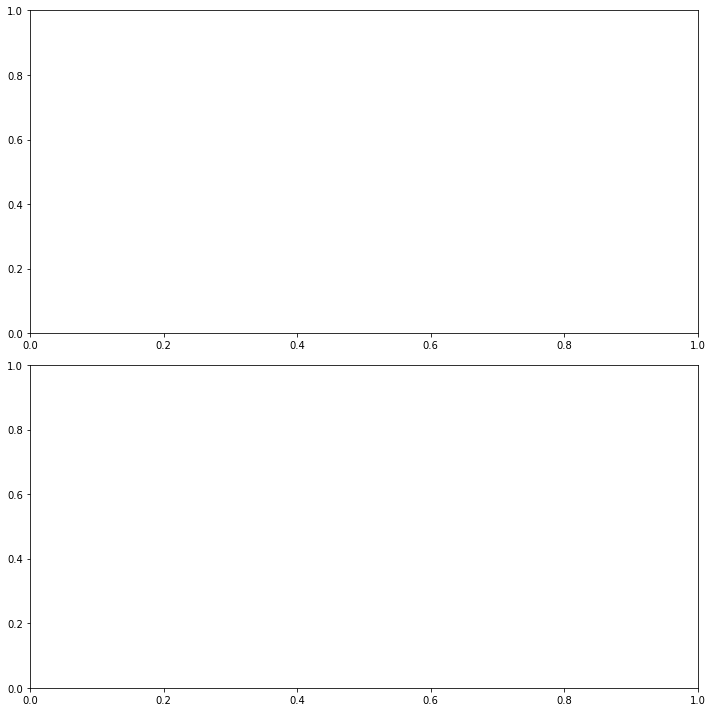

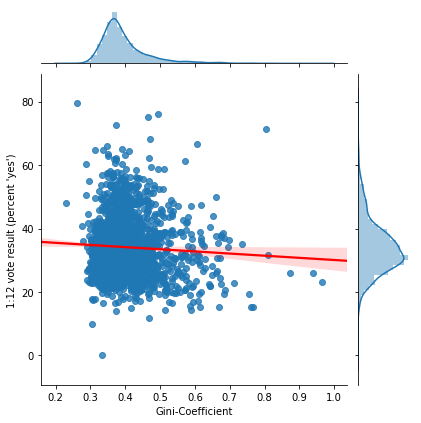

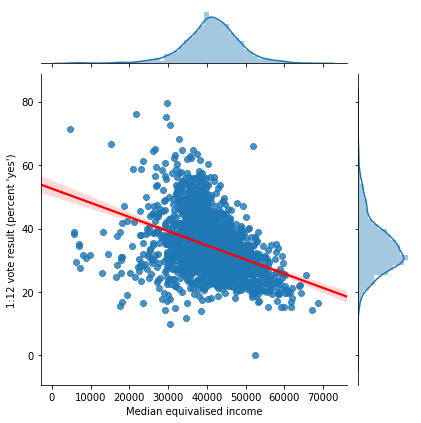

In [18]:
# plot bivariate scatterplots
fig = plt.figure(figsize=(10,10))
#g = sns.jointplot(x="gini_coeff", y="yes_perc", data=corrdata2, kind='reg',
#                  joint_kws={'line_kws':{'color':'cyan'}})
#seaborn.jointplot(x="gini_coeff", y="yes_perc", data=corrdata2, kind='reg',
#                  joint_kws={'line_kws':{'color':'red'}})
fig.add_subplot(2,1,1)
seaborn.jointplot(x="gini_coeff", y="yes_perc", data=corrdata2, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})
plt.xlabel("Gini-Coefficient");
plt.ylabel("1:12 vote result (percent 'yes')");
#plt.title("Association between Gini-Coefficient and vote result");

fig.add_subplot(2,1,2)
seaborn.jointplot(x="median_income", y="yes_perc", data=corrdata2, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})
plt.xlabel("Median equivalised income");
plt.ylabel("1:12 vote result (percent 'yes')");
#plt.title("Association between Median equivalised income and vote result");

fig.tight_layout()
plt.show()


In [19]:
# Pearson correlation between internet usage and breast cancer
import scipy
by_canton = corrdata2.groupby("canton")

print("association between mean income and vote result - ZH")
print(scipy.stats.pearsonr(by_canton.get_group("ZH")["median_income"],
                           by_canton.get_group("ZH")["yes_perc"]))

print("\nassociation between mean income and vote result - BE")
print(scipy.stats.pearsonr(by_canton.get_group("BE")["median_income"],
                           by_canton.get_group("BE")["yes_perc"]))

print("\nassociation between mean income and vote result - GE")
print(scipy.stats.pearsonr(by_canton.get_group("GE")["median_income"],
                           by_canton.get_group("GE")["yes_perc"]))
print("\nassociation between mean income and vote result - BL")
print(scipy.stats.pearsonr(by_canton.get_group("BL")["median_income"],
                           by_canton.get_group("BL")["yes_perc"]))
print("\nassociation between mean income and vote result - BS")
print(scipy.stats.pearsonr(by_canton.get_group("BS")["median_income"],
                           by_canton.get_group("BS")["yes_perc"]))
print("\nassociation between mean income and vote result - UR")
print(scipy.stats.pearsonr(by_canton.get_group("UR")["median_income"],
                           by_canton.get_group("UR")["yes_perc"]))
print("\nassociation between mean income and vote result - JU")
print(scipy.stats.pearsonr(by_canton.get_group("JU")["median_income"],
                           by_canton.get_group("JU")["yes_perc"]))
print("\nassociation between mean income and vote result - TI")
print(scipy.stats.pearsonr(by_canton.get_group("TI")["median_income"],
                           by_canton.get_group("TI")["yes_perc"]))
print("\nassociation between mean income and vote result - GR")
print(scipy.stats.pearsonr(by_canton.get_group("GR")["median_income"],
                           by_canton.get_group("GR")["yes_perc"]))
print("\nassociation between mean income and vote result - ZG")
print(scipy.stats.pearsonr(by_canton.get_group("ZG")["median_income"],
                           by_canton.get_group("ZG")["yes_perc"]))
print("\nassociation between mean income and vote result - FR")
print(scipy.stats.pearsonr(by_canton.get_group("FR")["median_income"],
                           by_canton.get_group("FR")["yes_perc"]))
print("\nassociation between mean income and vote result - NE")
print(scipy.stats.pearsonr(by_canton.get_group("NE")["median_income"],
                           by_canton.get_group("NE")["yes_perc"]))
print("\nassociation between mean income and vote result - AR")
print(scipy.stats.pearsonr(by_canton.get_group("AR")["median_income"],
                           by_canton.get_group("AR")["yes_perc"]))
print("\nassociation between mean income and vote result - AI")
print(scipy.stats.pearsonr(by_canton.get_group("AI")["median_income"],
                           by_canton.get_group("AI")["yes_perc"]))
print("\nassociation between mean income and vote result - VS")
print(scipy.stats.pearsonr(by_canton.get_group("VS")["median_income"],
                           by_canton.get_group("VS")["yes_perc"]))
print("\nassociation between mean income and vote result - VD")
print(scipy.stats.pearsonr(by_canton.get_group("VD")["median_income"],
                           by_canton.get_group("VD")["yes_perc"]))
print("\nassociation between mean income and vote result - GL")
print(scipy.stats.pearsonr(by_canton.get_group("GL")["median_income"],
                           by_canton.get_group("GL")["yes_perc"]))
print("\nassociation between mean income and vote result - SO")
print(scipy.stats.pearsonr(by_canton.get_group("SO")["median_income"],
                           by_canton.get_group("SO")["yes_perc"]))
print("\nassociation between mean income and vote result - AG")
print(scipy.stats.pearsonr(by_canton.get_group("AG")["median_income"],
                           by_canton.get_group("AG")["yes_perc"]))
print("\nassociation between mean income and vote result - LU")
print(scipy.stats.pearsonr(by_canton.get_group("LU")["median_income"],
                           by_canton.get_group("LU")["yes_perc"]))
print("\nassociation between mean income and vote result - SZ")
print(scipy.stats.pearsonr(by_canton.get_group("SZ")["median_income"],
                           by_canton.get_group("SZ")["yes_perc"]))
print("\nassociation between mean income and vote result - OW")
print(scipy.stats.pearsonr(by_canton.get_group("OW")["median_income"],
                           by_canton.get_group("OW")["yes_perc"]))
print("\nassociation between mean income and vote result - NW")
print(scipy.stats.pearsonr(by_canton.get_group("NW")["median_income"],
                           by_canton.get_group("NW")["yes_perc"]))
print("\nassociation between mean income and vote result - TG")
print(scipy.stats.pearsonr(by_canton.get_group("TG")["median_income"],
                           by_canton.get_group("TG")["yes_perc"]))
print("\nassociation between mean income and vote result - SG")
print(scipy.stats.pearsonr(by_canton.get_group("SG")["median_income"],
                           by_canton.get_group("SG")["yes_perc"]))
print("\nassociation between mean income and vote result - Sh")
print(scipy.stats.pearsonr(by_canton.get_group("SH")["median_income"],
                           by_canton.get_group("SH")["yes_perc"]))



print("\nassociation between internet usage and breast cancer cases - all")
print(scipy.stats.pearsonr(corrdata2["median_income"], corrdata2["yes_perc"]))

association between mean income and vote result - ZH
(-0.705987582461293, 5.834410135388026e-27)

association between mean income and vote result - BE
(-0.3071901968088795, 3.7643324501437465e-09)

association between mean income and vote result - GE
(-0.741663275737299, 5.592782085176838e-09)

association between mean income and vote result - BL
(-0.6541824445638215, 8.479606156370596e-12)

association between mean income and vote result - BS
(-0.9996086350646788, 0.017811489607527507)

association between mean income and vote result - UR
(-0.09447527486674615, 0.6919652291190055)

association between mean income and vote result - JU
(0.10402453326754946, 0.44126364710683996)

association between mean income and vote result - TI
(-0.3049385788810716, 0.0003229489805127944)

association between mean income and vote result - GR
(0.13405477103769103, 0.10671043396088549)

association between mean income and vote result - ZG
(-0.2603712683467694, 0.4393675166764902)

association between m

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(x).reshape((-1, 1))
y = np.array(y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.15145074099240274
intercept: 52.56642075532764
slope: [-0.00044709]


In [21]:
import numpy as np
import statsmodels.api as sm

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     417.8
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.39e-85
Time:                        10:10:52   Log-Likelihood:                -8149.0
No. Observations:                2343   AIC:                         1.630e+04
Df Residuals:                    2341   BIC:                         1.631e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.5664      0.915     57.453      0.0

In [22]:
from statsmodels.formula.api import ols

corrdata2 = mydata.drop(columns=['taxable', 'turnout_perc','commune'])
fit = ols('yes_perc ~ mean_income', data=corrdata2).fit() 

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               yes_perc   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     119.5
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           3.71e-27
Time:                        10:10:52   Log-Likelihood:                -8283.1
No. Observations:                2343   AIC:                         1.657e+04
Df Residuals:                    2341   BIC:                         1.658e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.5586      0.355    105.755      

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 5 columns):
canton           170 non-null object
mean_income      170 non-null float64
median_income    170 non-null float64
gini_coeff       170 non-null float64
yes_perc         170 non-null float64
dtypes: float64(4), object(1)
memory usage: 8.0+ KB


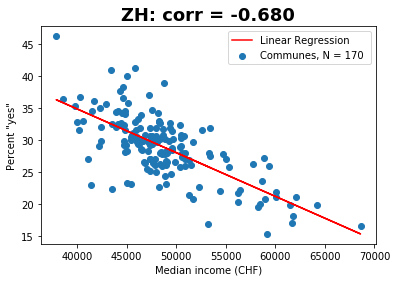

In [23]:
zhall=alldata.query('KANTONKZ=="ZH"')
zhlist=zhall["GMDNAME"].tolist()
one=zhall[zhall['GMDNAME']=="Bonstetten"]
onepoly=one.iat[0,16]
zhpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in zhlist:
    one=zhall[zhall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    zhpoly=zhpoly.union(onepoly)



ZH =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
zh = ZH.query('canton=="ZH"')
x = zh['median_income']
y = zh['yes_perc']
corr=zh.corr(method='pearson')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
zhcorr=-0.705987582461293
zh.info()
n=170
ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('ZH: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 353 entries, 170 to 2342
Data columns (total 5 columns):
canton           353 non-null object
mean_income      353 non-null float64
median_income    353 non-null float64
gini_coeff       353 non-null float64
yes_perc         353 non-null float64
dtypes: float64(4), object(1)
memory usage: 16.5+ KB


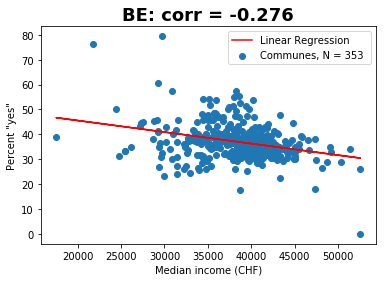

In [24]:
beall=alldata.query('KANTONKZ=="BE"')
belist=beall["GMDNAME"].tolist()
one=beall[beall['GMDNAME']=="Thun"]
onepoly=one.iat[0,16]
bepoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in belist:
    one=beall[beall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    bepoly=bepoly.union(onepoly)



BE =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
be = BE.query('canton=="BE"')
x = be['median_income']
y = be['yes_perc']
corr=be.corr(method='spearman')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
becorr=-0.3071901968088795
be.info()
n=353
ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('BE: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 89 entries, 953 to 1041
Data columns (total 5 columns):
canton           89 non-null object
mean_income      89 non-null float64
median_income    89 non-null float64
gini_coeff       89 non-null float64
yes_perc         89 non-null float64
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


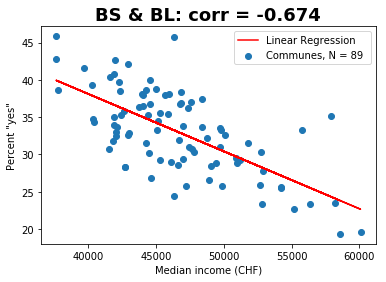

In [25]:
bsall=alldata.query('KANTONKZ=="BS" | KANTONKZ=="BL"')
bslist=bsall["GMDNAME"].tolist()
one=bsall[bsall['GMDNAME']=="Basel"]
onepoly=one.iat[0,16]
bspoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in bslist:
    one=bsall[bsall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    bspoly=bspoly.union(onepoly)





BS =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
bs = BS.query('canton=="BL" | canton=="BS"')
x = bs['median_income']
y = bs['yes_perc']
corr=bs.corr(method='pearson')
corr = pd.DataFrame(corr)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
thecorr=corr.iat[0,3]
bscorr=thecorr
bs.info()
n=89
ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('BS & BL: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 135 entries, 1610 to 1744
Data columns (total 5 columns):
canton           135 non-null object
mean_income      135 non-null float64
median_income    135 non-null float64
gini_coeff       135 non-null float64
yes_perc         135 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB
-0.000387782979465338 63.293178156378985 -0.30493857888107156 0.000322948980512794 0.00010501641246759671


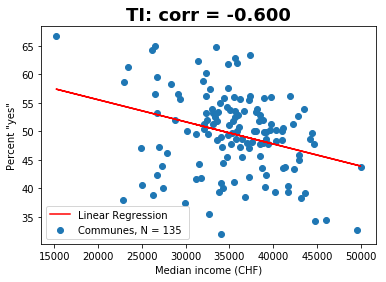

In [26]:
tiall=alldata.query('KANTONKZ=="TI"')
tilist=tiall["GMDNAME"].tolist()
one=tiall[tiall['GMDNAME']=="Lugano"]
onepoly=one.iat[0,16]
tipoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in tilist:
    one=tiall[tiall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    tipoly=tipoly.union(onepoly)


TI =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ti = TI.query('canton=="TI"')
x = ti['median_income']
y = ti['yes_perc']
corr=ti.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
ticorr=-0.3049385788810716
ti.info()
n=135
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('TI: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 134 entries, 2063 to 2196
Data columns (total 5 columns):
canton           134 non-null object
mean_income      134 non-null float64
median_income    134 non-null float64
gini_coeff       134 non-null float64
yes_perc         134 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.3+ KB
-8.377586619874448e-05 36.56870528657527 -0.09771977010097976 0.261318099320251 7.426188837029394e-05


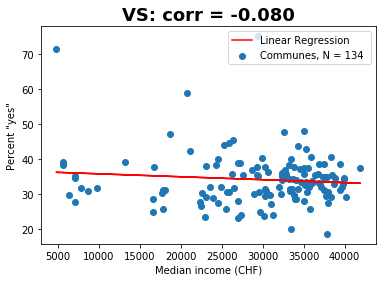

In [27]:
vsall=alldata.query('KANTONKZ=="VS"')
vslist=vsall["GMDNAME"].tolist()
one=vsall[vsall['GMDNAME']=="Sion"]
onepoly=one.iat[0,16]
vspoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in vslist:
    one=vsall[vsall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    vspoly=vspoly.union(onepoly)


VS =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
vs = VS.query('canton=="VS"')
x = vs['median_income']
y = vs['yes_perc']
corr=vs.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
vscorr=-0.09771977010097975
vs.info()
n=134
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('VS: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 318 entries, 1745 to 2062
Data columns (total 5 columns):
canton           318 non-null object
mean_income      318 non-null float64
median_income    318 non-null float64
gini_coeff       318 non-null float64
yes_perc         318 non-null float64
dtypes: float64(4), object(1)
memory usage: 14.9+ KB
-0.0004416955473761756 53.09649703057909 -0.4564658679706065 9.007170286049737e-18 4.8432260272992205e-05


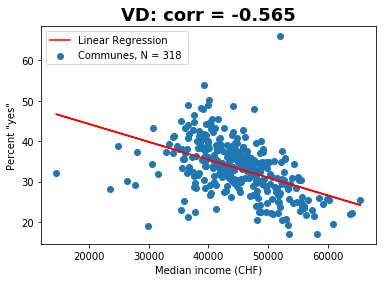

In [28]:
vdall=alldata.query('KANTONKZ=="VD"')
vdlist=vdall["GMDNAME"].tolist()
one=vdall[vdall['GMDNAME']=="Lausanne"]
onepoly=one.iat[0,16]
vdpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in vdlist:
    one=vdall[vdall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    vdpoly=vdpoly.union(onepoly)

VD =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
vd = VD.query('canton=="VD"')
x = vd['median_income']
y = vd['yes_perc']
corr=vd.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
vdcorr=-0.4564658679706066
vd.info()
n=318
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('VD: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 146 entries, 1171 to 1316
Data columns (total 5 columns):
canton           146 non-null object
mean_income      146 non-null float64
median_income    146 non-null float64
gini_coeff       146 non-null float64
yes_perc         146 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.8+ KB
0.00020769587024699917 25.545086369965997 0.13405477103769103 0.10671043396088514 0.00012794595695037945


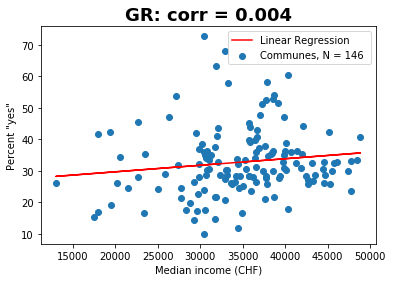

In [29]:
grall=alldata.query('KANTONKZ=="GR"')
grlist=grall["GMDNAME"].tolist()
one=grall[grall['GMDNAME']=="Chur"]
onepoly=one.iat[0,16]
grpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in grlist:
    one=grall[grall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    grpoly=grpoly.union(onepoly)


GR =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
gr = GR.query('canton=="GR"')
x = gr['median_income']
y = gr['yes_perc']
corr=gr.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
grcorr=0.13405477103769103
gr.info()
n=146
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('GR: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 57 entries, 2279 to 2335
Data columns (total 5 columns):
canton           57 non-null object
mean_income      57 non-null float64
median_income    57 non-null float64
gini_coeff       57 non-null float64
yes_perc         57 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.7+ KB
0.0001979532007749455 40.7778362961218 0.10402453326754944 0.44126364710684063 0.00025520126861748295


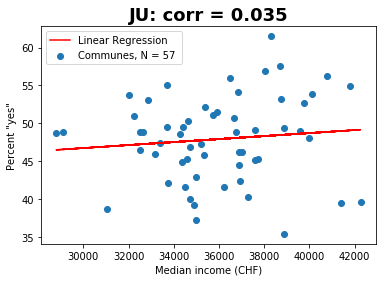

In [30]:
juall=alldata.query('KANTONKZ=="JU"')
julist=juall["GMDNAME"].tolist()
one=juall[juall['GMDNAME']=="Delémont"]
onepoly=one.iat[0,16]
jupoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in julist:
    one=juall[juall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    jupoly=jupoly.union(onepoly)

JU =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ju = JU.query('canton=="JU"')
x = ju['median_income']
y = ju['yes_perc']
corr=ju.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
jucorr=0.10402453326754946
ju.info()
n=57
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('JU: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 26 entries, 1068 to 1093
Data columns (total 5 columns):
canton           26 non-null object
mean_income      26 non-null float64
median_income    26 non-null float64
gini_coeff       26 non-null float64
yes_perc         26 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB
-0.0002813622282791879 42.684200823132045 -0.15200022769014884 0.45853718542963695 0.00037345655414984785


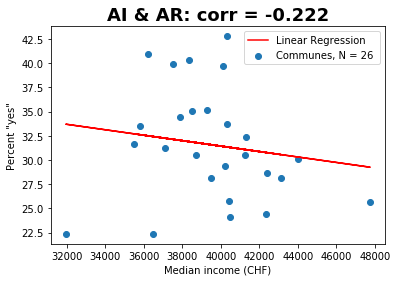

In [31]:
apall=alldata.query('KANTONKZ=="AI" | KANTONKZ=="AR"')
aplist=apall["GMDNAME"].tolist()
one=apall[apall['GMDNAME']=="Herisau"]
onepoly=one.iat[0,16]
appoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in aplist:
    one=apall[apall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    appoly=appoly.union(onepoly)




AP =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ap = AP.query('canton=="AI" | canton=="AR"')
x = ap['median_income']
y = ap['yes_perc']
corr=ap.corr(method='pearson')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
apcorr=thecorr
ap.info()
n=26
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('AI & AR: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18 entries, 649 to 666
Data columns (total 5 columns):
canton           18 non-null object
mean_income      18 non-null float64
median_income    18 non-null float64
gini_coeff       18 non-null float64
yes_perc         18 non-null float64
dtypes: float64(4), object(1)
memory usage: 864.0+ bytes
-0.0004250996118281793 44.99663393755645 -0.5503652061741103 0.017948632132660958 0.00016122289258381465


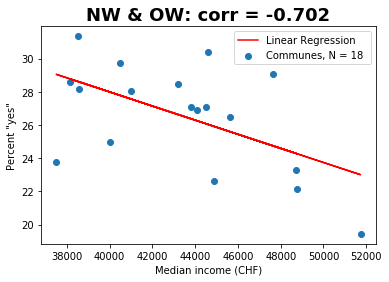

In [32]:
owall=alldata.query('KANTONKZ=="NW" | KANTONKZ=="OW"')
owlist=owall["GMDNAME"].tolist()
one=owall[owall['GMDNAME']=="Stans"]
onepoly=one.iat[0,16]
owpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in owlist:
    one=owall[owall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    owpoly=owpoly.union(onepoly)



OW =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ow = OW.query('canton=="NW" | canton=="OW"')
x = ow['median_income']
y = ow['yes_perc']
corr=ow.corr(method='pearson')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
owcorr=thecorr
ow.info()
n=18
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('NW & OW: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 37 entries, 2197 to 2233
Data columns (total 5 columns):
canton           37 non-null object
mean_income      37 non-null float64
median_income    37 non-null float64
gini_coeff       37 non-null float64
yes_perc         37 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.7+ KB
-0.0005142266597256592 61.94088485284922 -0.28907211665393234 0.08269315508239082 0.00028784967616511344


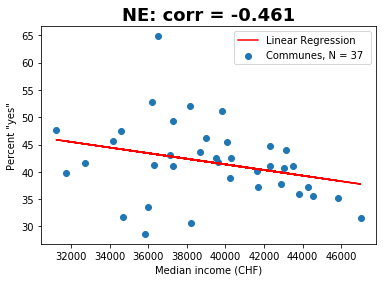

In [33]:
neall=alldata.query('KANTONKZ=="NE"')
nelist=neall["GMDNAME"].tolist()
one=neall[neall['GMDNAME']=="Neuchâtel"]
onepoly=one.iat[0,16]
nepoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in nelist:
    one=neall[neall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    nepoly=nepoly.union(onepoly)



NE =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ne = NE.query('canton=="NE"')
x = ne['median_income']
y = ne['yes_perc']
corr=ne.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
necorr=-0.28907211665393234
ne.info()
n=37
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('NE: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 45 entries, 2234 to 2278
Data columns (total 5 columns):
canton           45 non-null object
mean_income      45 non-null float64
median_income    45 non-null float64
gini_coeff       45 non-null float64
yes_perc         45 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
-0.0008995200418279906 79.94492987708767 -0.741663275737299 5.59278208517682e-09 0.00012406378102706333


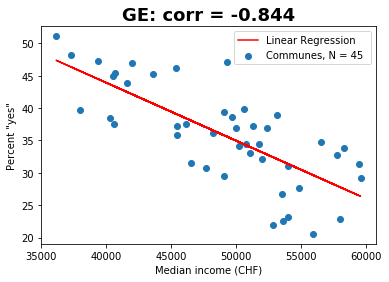

In [34]:
geall=alldata.query('KANTONKZ=="GE"')
gelist=geall["GMDNAME"].tolist()
one=geall[geall['GMDNAME']=="Genève"]
onepoly=one.iat[0,16]
gepoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in gelist:
    one=geall[geall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    gepoly=gepoly.union(onepoly)





GE =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ge = GE.query('canton=="GE"')
x = ge['median_income']
y = ge['yes_perc']
corr=ge.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
gecorr=-0.741663275737299
ge.info()
n=45
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('GE: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 77 entries, 1094 to 1170
Data columns (total 5 columns):
canton           77 non-null object
mean_income      77 non-null float64
median_income    77 non-null float64
gini_coeff       77 non-null float64
yes_perc         77 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.6+ KB
-0.0005507849206869111 52.8251288538582 -0.5420782125760577 3.547404268305192e-07 9.859123616580053e-05


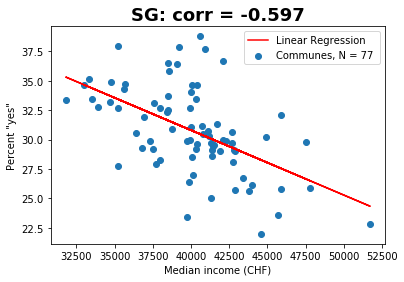

In [35]:
sgall=alldata.query('KANTONKZ=="SG"')
sglist=sgall["GMDNAME"].tolist()
one=sgall[sgall['GMDNAME']=="Nesslau"]
onepoly=one.iat[0,16]
sgpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in sglist:
    one=sgall[sgall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    sgpoly=sgpoly.union(onepoly)

SG =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
sg = SG.query('canton=="SG"')
x = sg['median_income']
y = sg['yes_perc']
corr=sg.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
sgcorr=-0.5420782125760579
sg.info()
n=77
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('SG: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 213 entries, 1317 to 1529
Data columns (total 5 columns):
canton           213 non-null object
mean_income      213 non-null float64
median_income    213 non-null float64
gini_coeff       213 non-null float64
yes_perc         213 non-null float64
dtypes: float64(4), object(1)
memory usage: 10.0+ KB
-0.0003953813072205301 46.51888823373207 -0.357726260185301 7.924362073601926e-08 7.105428519802978e-05


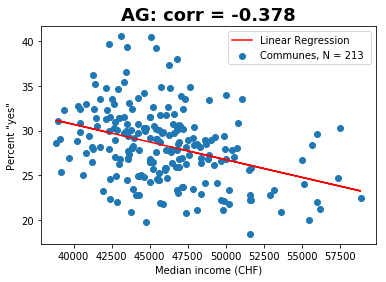

In [36]:
agall=alldata.query('KANTONKZ=="AG"')
aglist=agall["GMDNAME"].tolist()
one=agall[agall['GMDNAME']=="Aarau"]
onepoly=one.iat[0,16]
agpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in aglist:
    one=agall[agall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    agpoly=agpoly.union(onepoly)

AG =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ag = AG.query('canton=="AG"')
x = ag['median_income']
y = ag['yes_perc']
corr=ag.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
agcorr=-0.35772626018530107
ag.info()
n=213
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('AG: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 80 entries, 1530 to 1609
Data columns (total 5 columns):
canton           80 non-null object
mean_income      80 non-null float64
median_income    80 non-null float64
gini_coeff       80 non-null float64
yes_perc         80 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ KB
-0.0004275467097099952 48.07750424882046 -0.35258498935071314 0.001338192621906472 0.00012848313122110376


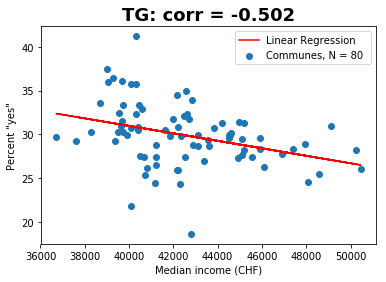

In [37]:
tgall=alldata.query('KANTONKZ=="TG"')
tglist=tgall["GMDNAME"].tolist()
one=tgall[tgall['GMDNAME']=="Frauenfeld"]
onepoly=one.iat[0,16]
tgpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in tglist:
    one=tgall[tgall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    tgpoly=tgpoly.union(onepoly)


TG =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
tg = TG.query('canton=="TG"')
x = tg['median_income']
y = tg['yes_perc']
corr=tg.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
tgcorr=-0.35258498935071325
tg.info()
n=80
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('TG: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 20 entries, 599 to 618
Data columns (total 5 columns):
canton           20 non-null object
mean_income      20 non-null float64
median_income    20 non-null float64
gini_coeff       20 non-null float64
yes_perc         20 non-null float64
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes
-0.00012416374182609594 35.033577605118396 -0.09447527486674616 0.6919652291190047 0.00030838518736036376


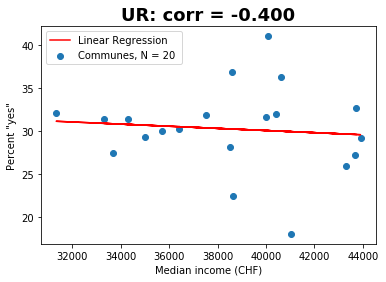

In [38]:
urall=alldata.query('KANTONKZ=="UR"')
urlist=urall["GMDNAME"].tolist()
one=urall[urall['GMDNAME']=="Erstfeld"]
onepoly=one.iat[0,16]
urpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in urlist:
    one=urall[urall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    urpoly=urpoly.union(onepoly)


UR =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
ur = UR.query('canton=="UR"')
x = ur['median_income']
y = ur['yes_perc']
corr=ur.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
urcorr=-0.09447527486674615
ur.info()
n=20
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('UR: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 30 entries, 619 to 648
Data columns (total 5 columns):
canton           30 non-null object
mean_income      30 non-null float64
median_income    30 non-null float64
gini_coeff       30 non-null float64
yes_perc         30 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.4+ KB
-0.00044972746510067577 43.96923639275187 -0.7053985891352624 1.3405484884436562e-05 8.540163189461728e-05


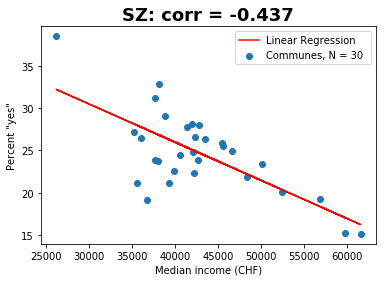

In [39]:
szall=alldata.query('KANTONKZ=="SZ"')
szlist=szall["GMDNAME"].tolist()
one=szall[szall['GMDNAME']=="Schwyz"]
onepoly=one.iat[0,16]
szpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in szlist:
    one=szall[szall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    szpoly=szpoly.union(onepoly)



SZ =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
sz = SZ.query('canton=="SZ"')
x = sz['median_income']
y = sz['yes_perc']
corr=sz.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
szcorr=-0.7053985891352623
sz.info()
n=30
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('SZ: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11 entries, 670 to 680
Data columns (total 5 columns):
canton           11 non-null object
mean_income      11 non-null float64
median_income    11 non-null float64
gini_coeff       11 non-null float64
yes_perc         11 non-null float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes
-0.00018608567123843135 31.108814264503394 -0.26037126834676944 0.4393675166764899 0.00023001425598816357


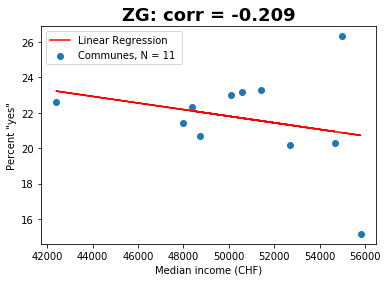

In [40]:
zgall=alldata.query('KANTONKZ=="ZG"')
zglist=zgall["GMDNAME"].tolist()
one=zgall[zgall['GMDNAME']=="Zug"]
onepoly=one.iat[0,16]
zgpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in zglist:
    one=zgall[zgall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    zgpoly=zgpoly.union(onepoly)



ZG =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
zg = ZG.query('canton=="ZG"')
x = zg['median_income']
y = zg['yes_perc']
corr=zg.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
zgcorr=-0.2603712683467694
zg.info()
n=11
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('ZG: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 83 entries, 516 to 598
Data columns (total 5 columns):
canton           83 non-null object
mean_income      83 non-null float64
median_income    83 non-null float64
gini_coeff       83 non-null float64
yes_perc         83 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB
-0.00031486530029834 40.804024709207795 -0.35607161605261367 0.0009539773018961359 9.181318095559939e-05


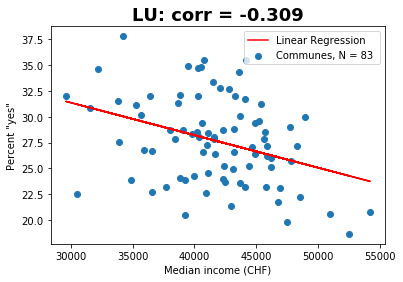

In [41]:
luall=alldata.query('KANTONKZ=="LU"')
lulist=luall["GMDNAME"].tolist()
one=luall[luall['GMDNAME']=="Luzern"]
onepoly=one.iat[0,16]
lupoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in lulist:
    one=luall[luall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    lupoly=lupoly.union(onepoly)


LU =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
lu = LU.query('canton=="LU"')
x = lu['median_income']
y = lu['yes_perc']
corr=lu.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
lucorr=-0.3560716160526137
lu.info()
n=83
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('LU: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 163 entries, 681 to 843
Data columns (total 5 columns):
canton           163 non-null object
mean_income      163 non-null float64
median_income    163 non-null float64
gini_coeff       163 non-null float64
yes_perc         163 non-null float64
dtypes: float64(4), object(1)
memory usage: 7.6+ KB
-0.0004391169382022372 55.04464026488857 -0.30067671101109456 9.624256361058906e-05 0.00010977188914649682


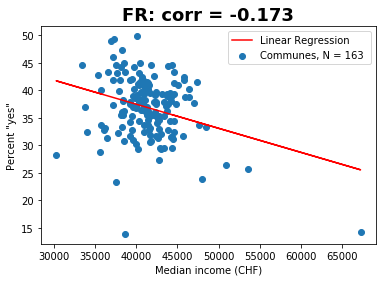

In [42]:
frall=alldata.query('KANTONKZ=="FR"')
frlist=frall["GMDNAME"].tolist()
one=frall[frall['GMDNAME']=="Rue"]
onepoly=one.iat[0,16]
frpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in frlist:
    one=frall[frall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    frpoly=frpoly.union(onepoly)



FR =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
fr = FR.query('canton=="FR"')
x = fr['median_income']
y = fr['yes_perc']
corr=fr.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
frcorr=-0.3006767110110948
fr.info()
n=163
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('FR: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3 entries, 667 to 669
Data columns (total 5 columns):
canton           3 non-null object
mean_income      3 non-null float64
median_income    3 non-null float64
gini_coeff       3 non-null float64
yes_perc         3 non-null float64
dtypes: float64(4), object(1)
memory usage: 144.0+ bytes
-0.0003744497807236107 48.71462604598564 -0.5095155081986877 0.6596492958341587 0.0006323646773960037


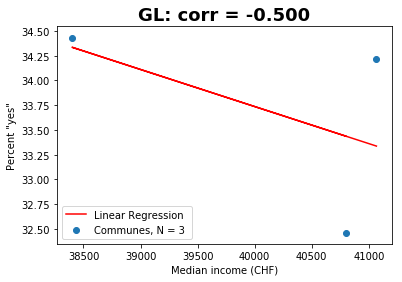

In [43]:
glall=alldata.query('KANTONKZ=="GL"')
gllist=glall["GMDNAME"].tolist()
one=glall[glall['GMDNAME']=="Glarus"]
onepoly=one.iat[0,16]
glpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in gllist:
    one=glall[glall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    glpoly=glpoly.union(onepoly)


GL =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
gl = GL.query('canton=="GL"')
x = gl['median_income']
y = gl['yes_perc']
corr=gl.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
glcorr=-0.509515508198688
gl.info()
n=3
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('GL: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 26 entries, 1042 to 1067
Data columns (total 5 columns):
canton           26 non-null object
mean_income      26 non-null float64
median_income    26 non-null float64
gini_coeff       26 non-null float64
yes_perc         26 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB
-0.00020458504463626836 39.81149496197527 -0.16780853409335658 0.4125517913809361 0.00024533057118512034


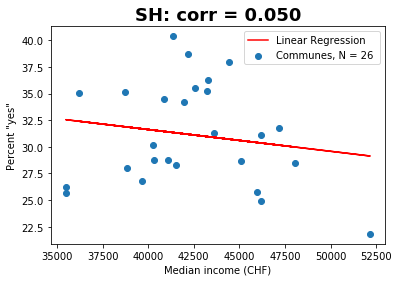

In [44]:
shall=alldata.query('KANTONKZ=="SH"')
shlist=shall["GMDNAME"].tolist()
one=shall[shall['GMDNAME']=="Schaffhausen"]
onepoly=one.iat[0,16]
shpoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in shlist:
    one=shall[shall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    shpoly=shpoly.union(onepoly)



SH =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
sh = SH.query('canton=="SH"')
x = sh['median_income']
y = sh['yes_perc']
corr=sh.corr(method='spearman')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
shcorr=-0.16780853409335664
sh.info()
n=26
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('SH: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 109 entries, 844 to 952
Data columns (total 5 columns):
canton           109 non-null object
mean_income      109 non-null float64
median_income    109 non-null float64
gini_coeff       109 non-null float64
yes_perc         109 non-null float64
dtypes: float64(4), object(1)
memory usage: 5.1+ KB
-0.00028979000819510524 45.89348042991236 -0.2555901416372109 0.0073099784565013835 0.00010596865599804835


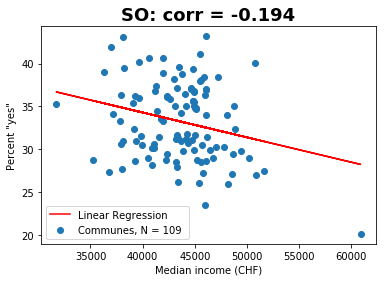

In [45]:
soall=alldata.query('KANTONKZ=="SO"')
solist=soall["GMDNAME"].tolist()
one=soall[soall['GMDNAME']=="Solothurn"]
onepoly=one.iat[0,16]
sopoly = gpd.GeoDataFrame({'geometry':[onepoly]})

for i in solist:
    one=soall[soall['GMDNAME']==i]
    onepoly=one.iat[0,16]
    #print(onepoly)
    sopoly=sopoly.union(onepoly)
SO =mydata.drop(columns=['taxable', 'turnout_perc','commune'])
so = SO.query('canton=="SO"')
x = so['median_income']
y = so['yes_perc']
corr=so.corr(method='pearson')
corr = pd.DataFrame(corr)
thecorr=corr.iat[0,3]
socorr=-0.255590141637211
so.info()
n=109
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

ax = plt.scatter(x,y,label= \
         'Communes, N = %1.0i ' % \
         (n))
plt.plot(x, intercept + slope*x, 'r', label='Linear Regression')
plt.title('SO: corr = %5.3f'% thecorr,fontdict={'fontsize': '18',
                        'fontweight' : 'bold'})
plt.legend()
plt.xlabel('Median income (CHF)')
plt.ylabel('Percent "yes"')
plt.show()


In [46]:








zh = gpd.GeoDataFrame({'canton':['ZH'],'corr':[zhcorr], 'geometry':zhpoly} )
be = gpd.GeoDataFrame({'canton':['BE'],'corr':[becorr], 'geometry':bepoly} )
sg = gpd.GeoDataFrame({'canton':['SG'],'corr':[sgcorr], 'geometry':sgpoly} )
sh = gpd.GeoDataFrame({'canton':['SH'],'corr':[shcorr], 'geometry':shpoly} )
tg = gpd.GeoDataFrame({'canton':['TG'],'corr':[tgcorr], 'geometry':tgpoly} )
ag = gpd.GeoDataFrame({'canton':['AG'],'corr':[agcorr], 'geometry':agpoly} )
ur = gpd.GeoDataFrame({'canton':['UR'],'corr':[urcorr], 'geometry':urpoly} )
gl = gpd.GeoDataFrame({'canton':['GL'],'corr':[glcorr], 'geometry':glpoly} )
bs = gpd.GeoDataFrame({'canton':['BL & BS'],'corr':[bscorr], 'geometry':bspoly} )
ow = gpd.GeoDataFrame({'canton':['OW & NW'],'corr':[owcorr], 'geometry':owpoly} )
ap = gpd.GeoDataFrame({'canton':['AI & AR'],'corr':[apcorr], 'geometry':appoly} )
ge = gpd.GeoDataFrame({'canton':['GE'],'corr':[gecorr], 'geometry':gepoly} )
fr = gpd.GeoDataFrame({'canton':['FR'],'corr':[frcorr], 'geometry':frpoly} )
gr = gpd.GeoDataFrame({'canton':['GR'],'corr':[grcorr], 'geometry':grpoly} )
sz = gpd.GeoDataFrame({'canton':['SZ'],'corr':[szcorr], 'geometry':szpoly} )
zg = gpd.GeoDataFrame({'canton':['ZG'],'corr':[zgcorr], 'geometry':zgpoly} )
ne = gpd.GeoDataFrame({'canton':['NE'],'corr':[necorr], 'geometry':nepoly} )
vs = gpd.GeoDataFrame({'canton':['VS'],'corr':[vscorr], 'geometry':vspoly} )
vd = gpd.GeoDataFrame({'canton':['VD'],'corr':[vdcorr], 'geometry':vdpoly} )
so = gpd.GeoDataFrame({'canton':['SO'],'corr':[socorr], 'geometry':sopoly} )
ti = gpd.GeoDataFrame({'canton':['TI'],'corr':[ticorr], 'geometry':tipoly} )
ju = gpd.GeoDataFrame({'canton':['JU'],'corr':[jucorr], 'geometry':jupoly} )
lu = gpd.GeoDataFrame({'canton':['LU'],'corr':[lucorr], 'geometry':lupoly} )

cantondata= pd.concat([zh, be])
cantondata= pd.concat([cantondata, sg])
cantondata= pd.concat([cantondata, sh])
cantondata= pd.concat([cantondata, tg])
cantondata= pd.concat([cantondata, ag])
cantondata= pd.concat([cantondata, ur])
cantondata= pd.concat([cantondata, gl])
cantondata= pd.concat([cantondata, bs])
cantondata= pd.concat([cantondata, ow])
cantondata= pd.concat([cantondata, ap])
cantondata= pd.concat([cantondata, ge])
cantondata= pd.concat([cantondata, fr])
cantondata= pd.concat([cantondata, gr])
cantondata= pd.concat([cantondata, sz])
cantondata= pd.concat([cantondata, zg])
cantondata= pd.concat([cantondata, ne])
cantondata= pd.concat([cantondata, vs])
cantondata= pd.concat([cantondata, vd])
cantondata= pd.concat([cantondata, so])
cantondata= pd.concat([cantondata, ti])
cantondata= pd.concat([cantondata, ju])
cantondata= pd.concat([cantondata, lu])



/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
/home/peb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


AttributeError: ("'float' object has no attribute 'centroid'", 'occurred at index 0')

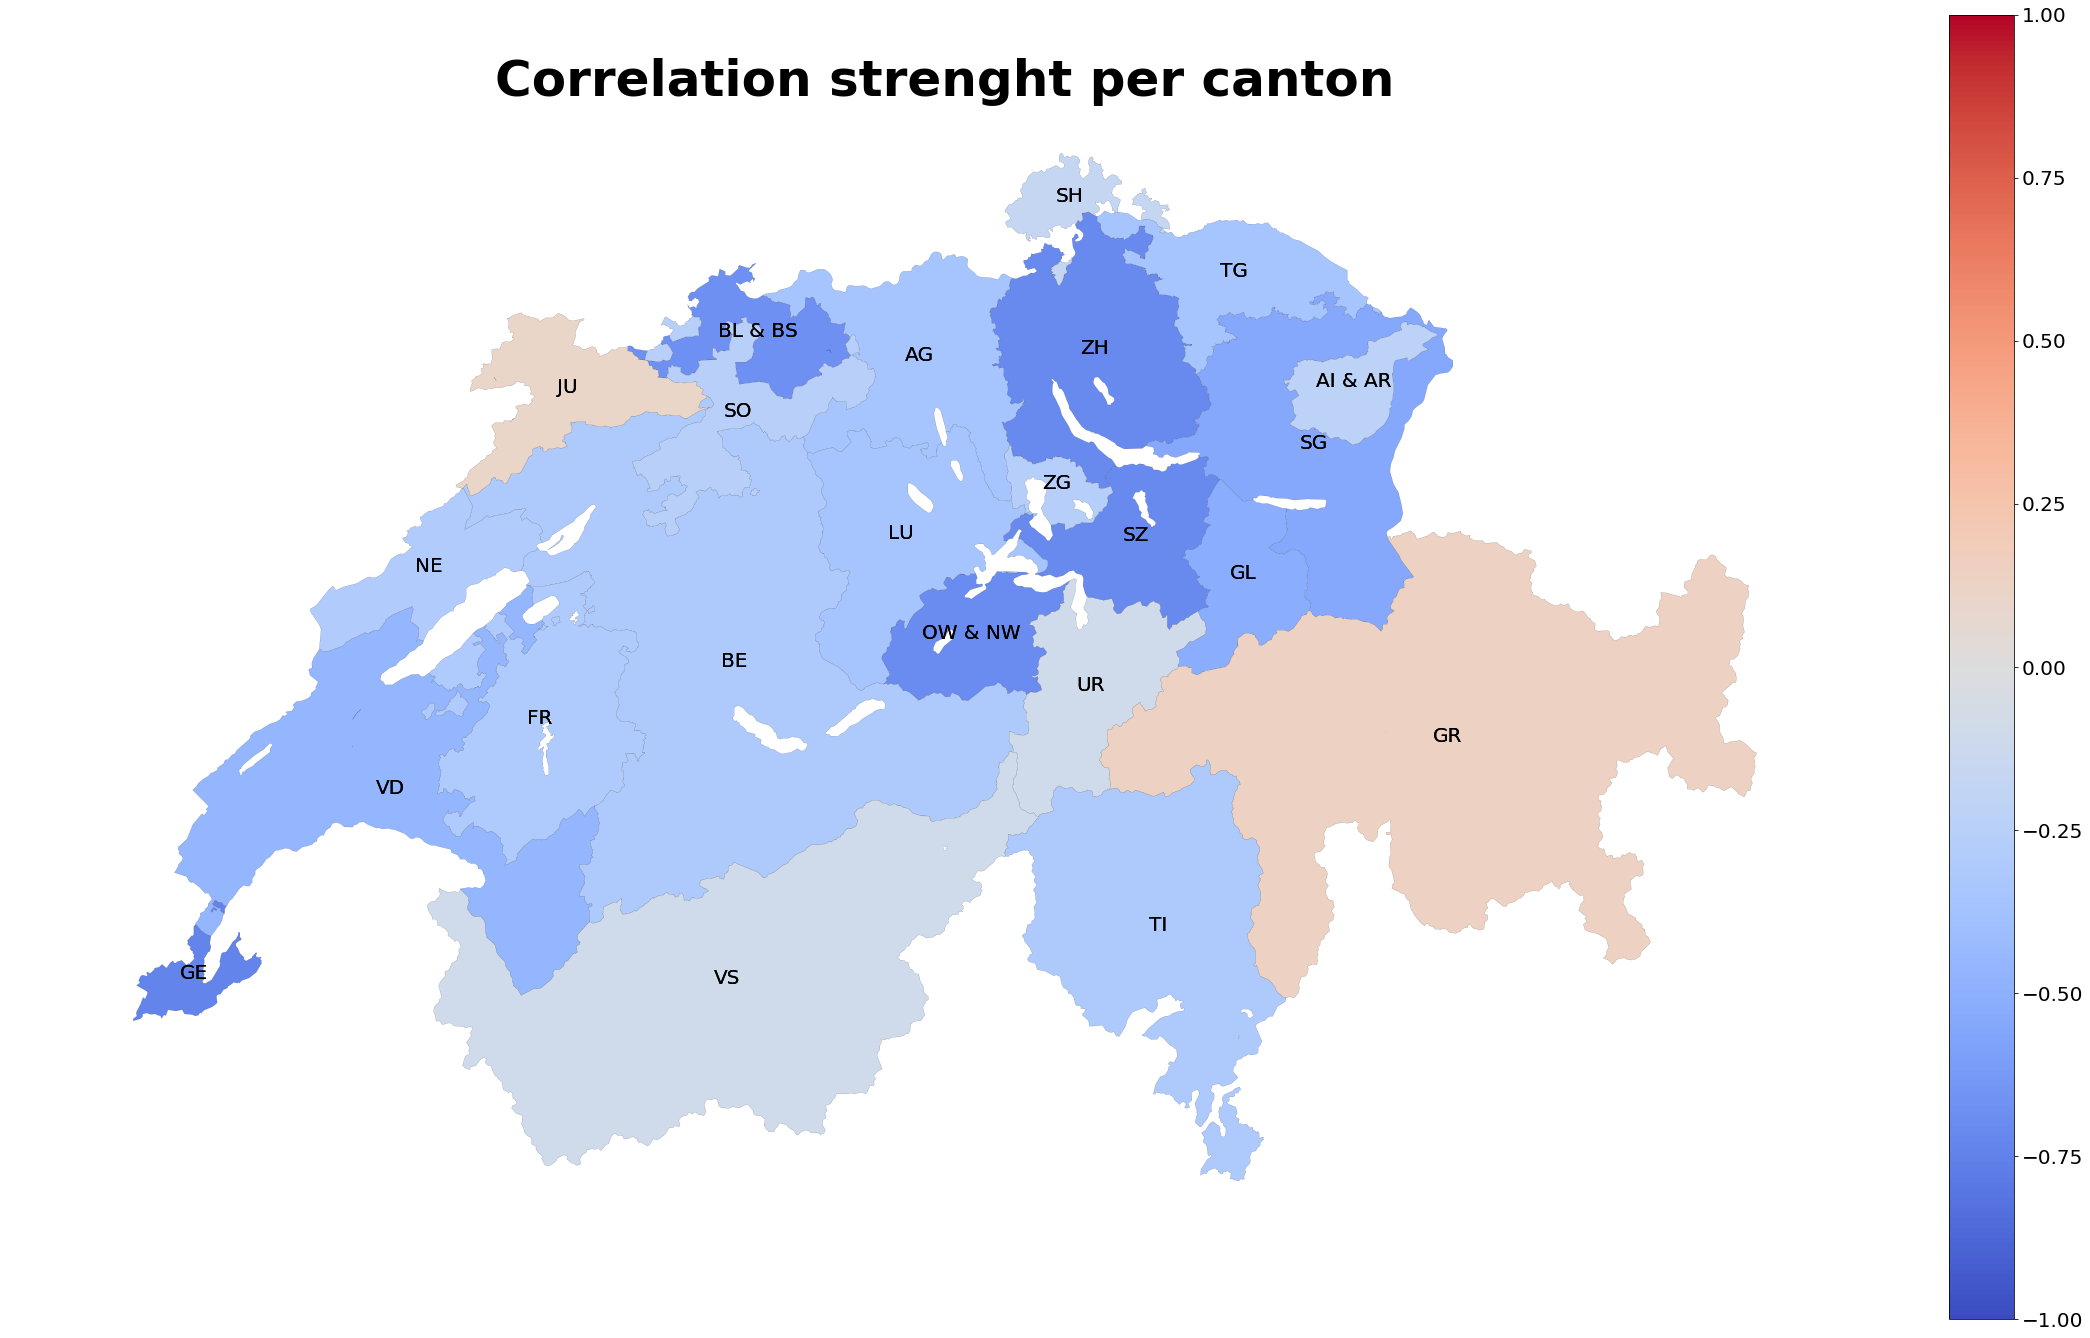

In [47]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib

newrow = gpd.GeoDataFrame({'corr':[1]})   
notherow = gpd.GeoDataFrame({'corr':[-1]})
# merge it back to the geodata data frame
mahdata = pd.concat([cantondata, newrow])
mahdata =pd.concat([mahdata,notherow])

variable = 'corr'

vmin, vmax = -1, 1

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(40, 24))
# create map
mahdata.plot(column=variable, cmap="coolwarm",alpha=1, linewidth=0.1, ax=ax, edgecolor='black')
#ani.plot(column=variable, cmap="Reds_r", alpha=1, linewidth=0.1, ax=ax, edgecolor='gray')
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Correlation strenght per canton', \
              fontdict={'fontsize': '50',
                        'fontweight' : 'bold'})

#ax.annotate('Source: \nFederal Statistical Office\nFederal Office of Topography swisstopo',
#           xy=(0.1, .08), xycoords='figure fraction',
#           horizontalalignment='left', verticalalignment='top',
#           fontsize=20, color='#555555')


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
mahdata.apply(lambda x: ax.annotate(s=x.canton, xy=x.geometry.centroid.coords[0], ha='center',fontsize=20),axis=1)

In [ ]:
plt.matshow(corrdata.corr())
plt.xticks(range(len(corrdata.columns)), corrdata.columns)
plt.yticks(range(len(corrdata.columns)), corrdata.columns)
plt.colorbar()
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )



In [ ]:
%matplotlib inline
data = corrdata

corr = data.corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



In [ ]:
plt.figure(figsize=(10, 10))
corrplot(corr)


In [ ]:
mahdata=cantondata
mahdata.crs = {'init' :'epsg:4326'}
mahdata.head()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from bokeh.models import Slope
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

# Data
x=np.array(corrdata2["median_income"])
y=np.array(corrdata2["yes_perc"])
# Make and fit a linear regression model
model = LinearRegression().fit(x.reshape(-1, 1), y)
# x values need to be in a two-dimensional array, so use .reshape(-1, 1)

# Find the slope and intercept from the model
slope = model.coef_[0] # Takes the first element of the array
intercept = model.intercept_

# Make the regression line
regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

# Plot the data and regression line
fig=figure()
fig.circle(x, y)
fig.add_layout(regression_line)
show(fig)


In [ ]:
corrdata2.head()

In [57]:
from bokeh.models import LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.models import ColumnDataSource, HoverTool, WheelZoomTool
from bokeh.plotting import figure
from bokeh.palettes import RdYlGn11 as palette
from bokeh.io import output_notebook, push_notebook, show
import numpy as np
from sklearn.linear_model import LinearRegression
from bokeh.models import Slope

output_notebook()

#palette = palette[::-1]
palette.reverse()

from bokeh.models import LogColorMapper, LogTicker, ColorBar
color_mapper = LinearColorMapper(palette="Viridis256", low=min(alldata["MEDIAN"]), high=max(alldata["MEDIAN"]))
color_bar = ColorBar(color_mapper=color_mapper, ticker=LogTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
# create map
fig =alldata.plot_bokeh(
    #figsize=(600, 400),
    category="MEDIAN",
    show_figure=False,
    show_colorbar=False,
    colormap="Viridis",
    line_color="black",
    title = "Distribution of Income: Median income",
    xlabel=None,
    ylabel=None,
    hovertool_string="""<h2> @{GMDNAME} </h2> 
    
                        <h3> Canton: @{KANTONKZ} </h3>
                        <h3> Median income: @{MEDIAN}{0.2f} </h3>
                        <h3> Gini-Coefficient: @{GINI} </h3>
                        <h3> Mean income: @{MITTELWERT}{0.2f} </h3>
                        <h3> N taxed: @{PFLICHTIG} </h3>""",
    #hovertool_columns=["GMDNAME", "GINI"],
    legend=False,
    fill_alpha=1,
    tile_provider=None,
    toolbar_location=None
)

fig.xgrid.visible = False
fig.ygrid.visible = False
fig.axis.visible = False
#color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
#                    ticker=BasicTicker(desired_num_ticks=len(colors)),
#                   label_standoff=6, border_line_color=None, location=(0, 0))
fig.add_layout(color_bar, 'right')

color_mapper2 = LinearColorMapper(palette=palette, low=min(alldata["NEINPERC_P"]), high=max(alldata["NEINPERC_P"]))
color_bar2 = ColorBar(color_mapper=color_mapper2, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0))
fig2=alldata.plot_bokeh(
    #figure=fig,         # <== pass figure here!
    #figsize=(600,400),
    category="NEINPERC_P",
    colormap="RdYlGn",
    title = "Vote result: overall result",
    show_colorbar=False,
    show_figure=False,
    line_color="black",
    tile_provider=None,
    toolbar_location=None,
    fill_alpha=1,
    colormap_uselog=True,
    hovertool_string="""<h2> @{GMDNAME} </h2> 
    
                        <h3> Percent 'yes': @{JAPERC_P}% </h3>
                        <h3> Kanton: @{KANTONKZ} </h3>""",
    #hovertool_columns=["GMDNAME", "JAPERC"],
    legend=False
)
fig2.xgrid.visible = False
fig2.ygrid.visible = False
fig2.axis.visible = False

fig2.add_layout(color_bar2, 'right')

x=np.array(corrdata2["median_income"])
y=np.array(corrdata2["yes_perc"])
# Make and fit a linear regression model
model = LinearRegression().fit(x.reshape(-1, 1), y)
# x values need to be in a two-dimensional array, so use .reshape(-1, 1)

# Find the slope and intercept from the model
slope = model.coef_[0] # Takes the first element of the array
intercept = model.intercept_

source = ColumnDataSource(data=dict(x=x, y=y))
hover = HoverTool(tooltips=[
    ("Median Income", "@x"),
    ("Percent 'yes'", " @y %")])
# Make the regression line
regression_line = Slope(gradient=slope, y_intercept=intercept, line_color="red")

# Plot the data and regression line
fig3=figure(
    tools=[hover],
    plot_width=500,
    plot_height=300,
    title = "Correlation of median income and vote result")
fig3.circle(x, y)
fig3.add_layout(regression_line)
fig3.add_tools(WheelZoomTool())


#[[fig, fig3], [fig2, None]]
dings=pandas_bokeh.plot_grid([[fig, fig3], [fig2, None]], 
                            plot_width=700,
                            toolbar_location=None)



handle = show(dings, notebook_handle=True)

# Update the plot title in the earlier cell
push_notebook(handle=handle)


Loading BokehJS ...

AttributeError: 'float' object has no attribute 'is_empty'

In [ ]:
alldata.plot_bokeh(
    figsize=(900, 600),
    dropdown=["MEDIAN", "MITTELWERT"],
    colormap="Viridis",
    hovertool_string="""<h2> @{GMDNAME} </h2> 
    
                        <h3> Ja: @{JAPERC_P}% </h3>
                        <h3> Kanton: @{KANTONKZ} </h3>
                        <h3> steuerpflichtig: @{PFLICHTIG} </h3>
                        <h3> Wahlbeteiligung @{BETEILIGUNG}% </h3>""",
    tile_provider=None,
    toolbar_location=None,
    fill_alpha=1  
    )


In [ ]:
mydata = alldata
mydata =mydata.drop(columns=['AREA_HA', 'BZNR', 'GMDNR_x', 'KTNR', 'X_CNTR', 'X_MAX', 'X_MIN', 'Y_CNTR', 'Y_MAX', 'Y_MIN', 'KANTNAME', 'GMDNR_y', 'GRNR', 'Z_AVG', 'Z_MAX', 'Z_MED','Z_MIN', 'geometry', 'JAPERC', 'NEINPERC', 'JAPERC_P'])
mydata = mydata.rename(columns={"GMDNAME": "commune", "JA": "vote_yes", "NEIN": "vote_no", "BETEILIGUNG": "turnout_perc", "KANTONKZ": "canton", "PFLICHTIG": "taxable", "MITTELWERT":"mean_income", "MEDIAN":"median_income", "GINI": "gini_coeff"})
mydata = mydata.iloc[:10]
print(mydata.to_latex())



In [56]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib

#newrow = gpd.GeoDataFrame({'GINI':[1]})   
#notherow = gpd.GeoDataFrame({'GINI':[0]})
# merge it back to the geodata data frame
#mahdata = pd.concat([alldata, newrow])
#mahdata =pd.concat([mahdata,notherow])
#alldata = mahdata
variable = 'MEDIAN'
cmap_reversed = matplotlib.cm.get_cmap('Blues')
#ani = mahdata.query('GMDNAME=="Anières" | GMDNAME=="Reisiswil"')
#elsed = mahdata.query('GMDNAME!="Anières" & GMDNAME!="Reisiswil"')
#ani.head()
# set the range for the choropleth

cm = plt.cm.get_cmap('bwr')
print(cm)
colors=cm(alldata["BETEILIGUNG"])
print(colors)
newcolmap = ListedColormap(colors)
#madata = pd.DataFrame(alldata)
#print(madata["JAPERC_P"])

vmin, vmax = min(alldata["MEDIAN"]), max(alldata["MEDIAN"])

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(200, 100))
# create map
alldata.plot(column=variable, cmap="viridis",alpha=1, linewidth=0.5, ax=ax, edgecolor='white')
#ani.plot(column=variable, cmap="Reds_r", alpha=1, linewidth=0.1, ax=ax, edgecolor='gray')
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Gini-Coefficient per commune', \
              fontdict={'fontsize': '50',
                        'fontweight' : 'bold'})
# \nFederal Chancellery FCh,\nState Chancelleries of cantons AG, FR, LU, GL, JU, NE, SG, SH, SO, TI, VD, VS, GR, BE, ZH 
# create an annotation for the  data source
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

[[1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 ...
 [1. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


In [151]:
df1 = alldata
df1['gini_rank']=pd.cut(df1['GINI'],3,labels=("a","b","c"))
df1['jarank']=pd.cut(df1['JAPERC'],3,labels=("a","b","c"))
df1.loc[(df1.gini_rank == "c") & (df1.jarank=="c"), 'dings'] = 8
df1.loc[(df1.gini_rank == "a") & (df1.jarank=="a"), 'dings'] = 0
df1.loc[(df1.gini_rank == "a") & (df1.jarank=="b"), 'dings'] = 1
df1.loc[(df1.gini_rank == "a") & (df1.jarank=="c"), 'dings'] = 2
df1.loc[(df1.gini_rank == "b") & (df1.jarank=="a"), 'dings'] = 3
df1.loc[(df1.gini_rank == "b") & (df1.jarank=="b"), 'dings'] = 4
df1.loc[(df1.gini_rank == "b") & (df1.jarank=="c"), 'dings'] = 5
df1.loc[(df1.gini_rank == "c") & (df1.jarank=="a"), 'dings'] = 6
df1.loc[(df1.gini_rank == "c") & (df1.jarank=="b"), 'dings'] = 7


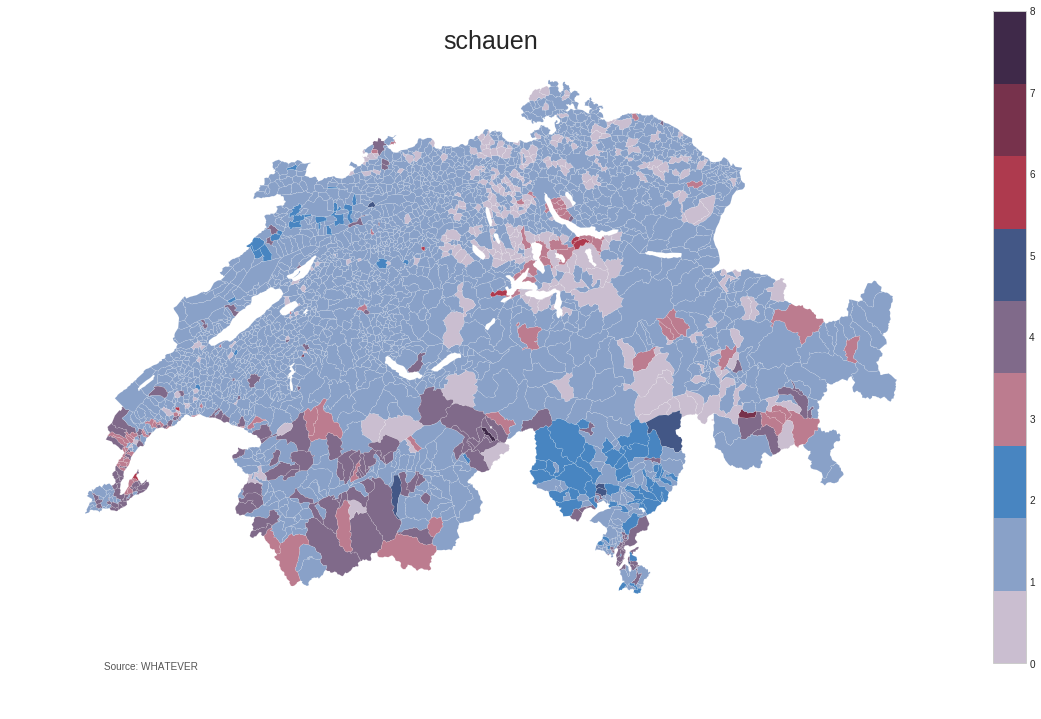

In [152]:
from matplotlib import colors
cmap = colors.ListedColormap(['#cabed0','#89a1c8','#4885c1','#bc7c8f','#806a8a','#435786','#ae3a4e','#77324c', '#3f2949'])

variable = 'dings'

# set the range for the choropleth
vmin, vmax = 0, 8

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,1, figsize=(20, 12))

# create map
df1.plot(column=variable, cmap=cmap,alpha=1, linewidth=0.1, ax=ax, edgecolor='white')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('schauen', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: WHATEVER',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

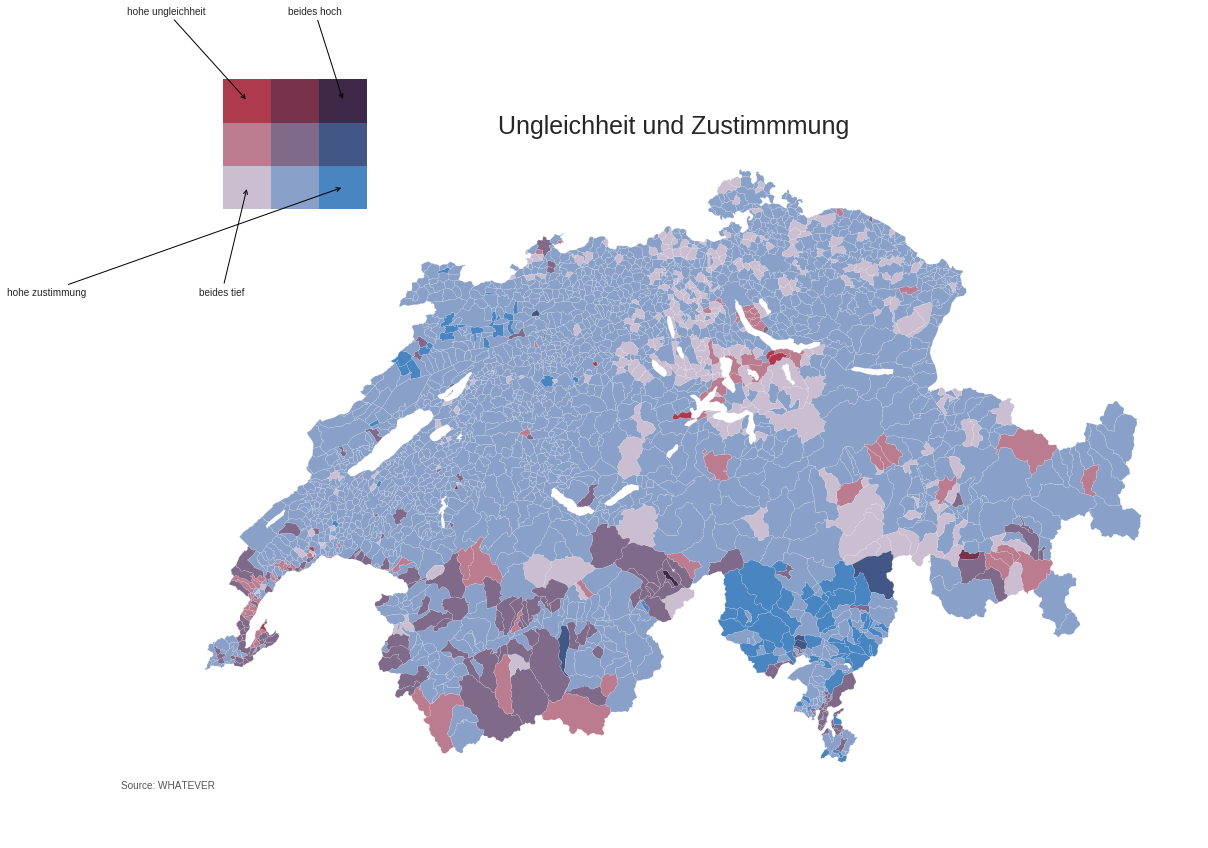

In [156]:
# Plot inside a plot
variable = 'dings'
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(20,12))
x = np.linspace(-0.50, 1., 1000)

# Outer Plot
df1.plot(column=variable, cmap=cmap,alpha=1, linewidth=0.1, ax=ax, edgecolor='white')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Ungleichheit und Zustimmmung', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: WHATEVER',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')


# Inner Plot
inner_ax = fig.add_axes([0.2, 0.8, 0.1, 0.15])# x, y, width, height
array = np.array([[0,1,2],
                    [3,4,5],
                    [6,7,8]])
reds = ["median_low", " ", "median_high"]
blues = ["avg_low"," ","avg_high"]
inner_ax.axis("off")
inner_ax.annotate('beides tief', xy=(0.5, 0.5), xytext=(-0.5, -2),
            arrowprops=dict(arrowstyle="->"))
inner_ax.annotate('beides hoch', xy=(2.5, 2.5), xytext=(1.35, 4.5),
            arrowprops=dict(arrowstyle="->"))
inner_ax.annotate('hohe ungleichheit', xy=(0.5, 2.5), xytext=(-2, 4.5),
            arrowprops=dict(arrowstyle="->"))
inner_ax.annotate('hohe zustimmung', xy=(2.5, 0.5), xytext=(-4.5, -2),
            arrowprops=dict(arrowstyle="->"))


plt.pcolor(np.array(array), cmap=cmap)
#heatmap = plt.pcolor(np.array(harvest), cmap=cmap)
#inner_ax.plot(heatmap)
plt.show()
  # reset to defaults